There are 5 classes of E. coli proteins in the dataset:

cp: cytoplasm;
im: inner membrane without signal sequence;
pp: periplasm;
imU: inner membrane, non cleavable signal sequence;
om: outer membrane

Each example is described using seven input variables calculated from its amino acid sequence.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
#Import data
dataset = pd.read_csv('ecoli.csv', header = None)
print(dataset.shape)

(327, 8)


In [3]:
#Describe dataset
pd.set_option('precision', 3)
print(dataset.describe())

             0       1        2      3        4        5        6
count  327.000  327.00  327.000  327.0  327.000  327.000  327.000
mean     0.494    0.50    0.485    0.5    0.499    0.497    0.503
std      0.194    0.15    0.050    0.0    0.123    0.217    0.207
min      0.000    0.16    0.480    0.5    0.000    0.030    0.000
25%      0.340    0.40    0.480    0.5    0.420    0.330    0.350
50%      0.490    0.47    0.480    0.5    0.490    0.450    0.430
75%      0.655    0.57    0.480    0.5    0.570    0.710    0.710
max      0.890    1.00    1.000    0.5    0.880    1.000    0.990


In [4]:
#Summarize class distribution
target = dataset.values[:, -1]
counter = Counter(target)

for protein_class, count in counter.items():
    percentage = count / len(target) * 100
    print('Class = %s, Count = %d, Percentage = %.3f%%' % (protein_class, count, percentage))

Class = cp, Count = 143, Percentage = 43.731%
Class = im, Count = 77, Percentage = 23.547%
Class = imU, Count = 35, Percentage = 10.703%
Class = om, Count = 20, Percentage = 6.116%
Class = pp, Count = 52, Percentage = 15.902%


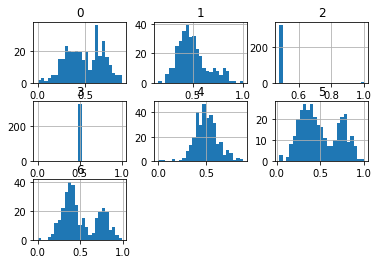

In [5]:
#Create histogram plot of each variable
dataset.hist(bins=25)
plt.show()

In [6]:
#Split into features & labels
data = dataset.values
x, y = data[:, :-1], data[:, -1]

In [7]:
#Encode target labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

print(x.shape, y.shape, Counter(y))

(327, 7) (327,) Counter({0: 143, 1: 77, 4: 52, 2: 35, 3: 20})


In [8]:
#Split data into training & test datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (196, 7)
Training Labels Shape: (196,)
Testing Features Shape: (131, 7)
Testing Labels Shape: (131,)


In [9]:
#Define reference model
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy='most_frequent')

In [10]:
#Test baseline model
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

def evaluate_model(x, y, model):
    cv = RepeatedStratifiedKFold(n_splits = 4, n_repeats = 3, random_state = 1)
    scores = cross_val_score(model, x, y, scoring = 'accuracy', cv = cv, n_jobs = -1)

    print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
    
evaluate_model(x_train, y_train, model)

Mean Accuracy: 0.429 (0.000)


In [11]:
#Optimise performance by using random forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)

#Build forest of trees from training set
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [12]:
#Test model using test dataset
evaluate_model(x_test, y_test, model)

Mean Accuracy: 0.870 (0.045)


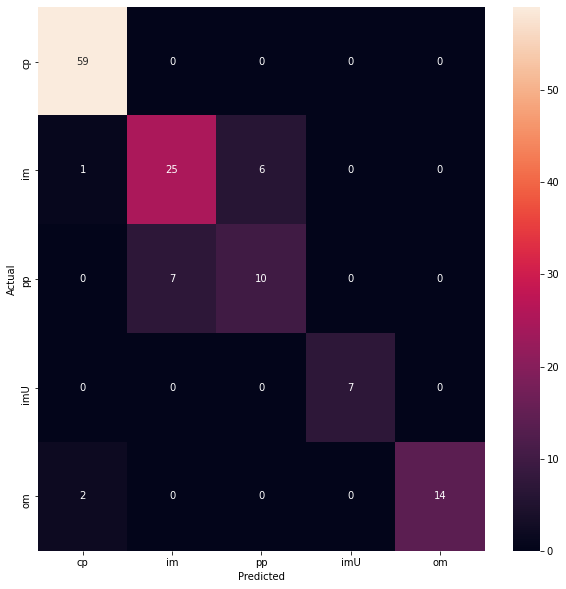

In [13]:
#Visualize predicted classes vs. target classes using confusion matrix
from sklearn.metrics import confusion_matrix

#Convert labels back to strings
y_pred = list(model.predict(x_test))
y_pred_str = le.inverse_transform(y_pred)

y_test_str = le.inverse_transform(list(y_test))

#Set up confusion matrix
conf_mat = confusion_matrix(y_test_str, y_pred_str)
fig, ax = plt.subplots(figsize = (10, 10))
poss_classes = ["cp", "im", "pp", "imU", "om"]

sns.heatmap(conf_mat, annot = True, fmt='d',
            xticklabels = poss_classes, yticklabels = poss_classes)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()